In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.DataFrame()
directory = os.path.join("..", "..", "SICP", "incident")
try:
  for filename in os.listdir(directory):
    new_df = pd.read_csv(os.path.join(directory,filename))
    df=df.append(new_df)
except e:
    print(e)

/Users/adwithyamagow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/adwithyamagow/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (8,9,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
sum(df["incident"] == True)/df.shape[0]

0.0014501720108920529

In [3]:
data = pd.read_csv("../../SICP/daily/02Nov19.csv")
track_data = data.loc[(data["station"] == "MOK") & (data["track"] == "38")]

Text(0.5, 1.0, 'Actual Occupied Time of Trains for MOK track 38 on 02 Nov 2019')

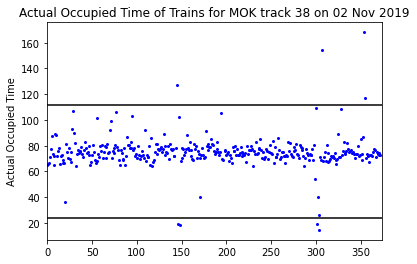

In [5]:
plt.clf()
plt.xlim(0, len(track_data))
plt.plot(range(len(track_data)), track_data["act_occupied_time"], "bo", markersize=2)
plt.hlines(track_data["act_occupied_time"].quantile(0.99), 0, 80000, colors="black")
plt.hlines(track_data["act_occupied_time"].quantile(0.01), 0, 80000, colors="black")
plt.ylabel("Actual Occupied Time")
plt.title("Actual Occupied Time of Trains for MOK track 38 on 02 Nov 2019")

In [6]:
outliers = track_data.loc[
    (track_data["act_occupied_time"] >= track_data["act_occupied_time"].quantile(0.99))
    | (
        track_data["act_occupied_time"]
        <= track_data["act_occupied_time"].quantile(0.01)
    )
]


Text(0.5, 1.0, 'Boxplot of Actual Occupied Time of Trains VS. Track MOK on 02 Nov 2019')

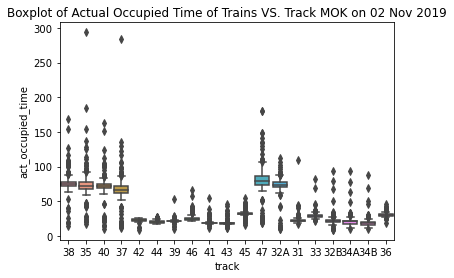

In [7]:
track_data = data.loc[data["station"] == "MOK"]

plt.figure()
sns.boxplot(x="track", y="act_occupied_time", data=track_data)
plt.title("Boxplot of Actual Occupied Time of Trains VS. Track MOK on 02 Nov 2019")


In [8]:
track_data = data.loc[data["train"].str.match("..06")].sort_values("act_arr_time")
outliers2 = track_data.loc[
    (track_data["act_occupied_time"] >= track_data["act_occupied_time"].quantile(0.99))
].sort_values("act_arr_time")

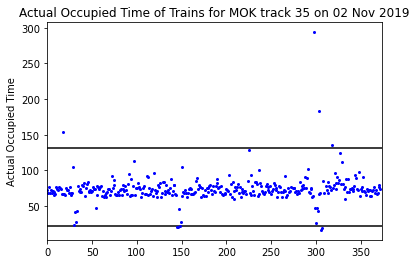

In [9]:
track_data = data.loc[(data["station"] == "MOK") & (data["track"] == "35")]
plt.figure()
plt.xlim(0, len(track_data))
plt.plot(range(len(track_data)), track_data["act_occupied_time"], "bo", markersize=2)
plt.hlines(track_data["act_occupied_time"].quantile(0.99), 0, 80000, colors="black")
plt.hlines(track_data["act_occupied_time"].quantile(0.01), 0, 80000, colors="black")
plt.ylabel("Actual Occupied Time")
plt.title("Actual Occupied Time of Trains for MOK track 35 on 02 Nov 2019")

outlier = track_data.loc[track_data["act_occupied_time"] > 250]